Dataset
- https://www.kaggle.com/datasets/skihikingkevin/csgo-matchmaking-damage/data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


import plotly.graph_objects as go
import plotly.express as px

# Dataframe

In [2]:
games_df_part1 = pd.read_csv('data/esea_meta_demos.part1.csv')
games_df_part2 = pd.read_csv('data/esea_meta_demos.part2.csv')

kills_df_part1 = pd.read_csv('data/esea_master_kills_demos.part1.csv')
kills_df_part2 = pd.read_csv('data/esea_master_kills_demos.part2.csv')

damage_df_part1 = pd.read_csv('data/esea_master_dmg_demos.part1.csv')
damage_df_part2 = pd.read_csv('data/esea_master_dmg_demos.part2.csv')

grenades_df_part1 = pd.read_csv('data/esea_master_grenades_demos.part1.csv')
grenades_df_part2 = pd.read_csv('data/esea_master_grenades_demos.part2.csv')

In [3]:
map_df = pd.read_csv('data/map_data.csv')
mm_grenades_df = pd.read_csv('data/mm_grenades_demos.csv')
weapon_events = pd.read_csv('data/mm_master_demos.csv')

## Games

In [4]:
games_df = pd.concat([games_df_part1, games_df_part2])
del games_df_part1
del games_df_part2
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377629 entries, 0 to 161709
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   file           377629 non-null  object 
 1   map            377629 non-null  object 
 2   round          377629 non-null  int64  
 3   start_seconds  377589 non-null  float64
 4   end_seconds    377589 non-null  float64
 5   winner_team    377628 non-null  object 
 6   winner_side    377628 non-null  object 
 7   round_type     377629 non-null  object 
 8   ct_eq_val      377629 non-null  int64  
 9   t_eq_val       377629 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 31.7+ MB


In [5]:
games_df['winner_side'].value_counts()

winner_side
Terrorist           193614
CounterTerrorist    184014
Name: count, dtype: int64

In [6]:
# Assuming mm_master is a pandas Series
mm_master = games_df['map'].value_counts()

# Usando uma paleta de cores do Plotly
colors = px.colors.qualitative.Set1

# Criando o gráfico de barras
fig = go.Figure(data=[go.Bar(x=mm_master.index, y=mm_master, marker_color=colors)])

# Atualizando o layout
fig.update_layout(title='Contagem de Mapas',
                  xaxis_title='Mapa',
                  yaxis_title='Contagem',
                  bargap=0.2)

# Exibindo o gráfico
fig.show()

## Kills

In [7]:
kills_df = pd.concat([kills_df_part1, kills_df_part2])
del kills_df_part1
del kills_df_part2
kills_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2742646 entries, 0 to 1173168
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   file             object 
 1   round            int64  
 2   tick             int64  
 3   seconds          float64
 4   att_team         object 
 5   vic_team         object 
 6   att_side         object 
 7   vic_side         object 
 8   wp               object 
 9   wp_type          object 
 10  ct_alive         int64  
 11  t_alive          int64  
 12  is_bomb_planted  bool   
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 274.6+ MB


In [8]:
kills_df['att_side'].value_counts()

att_side
CounterTerrorist    1386094
Terrorist           1356552
Name: count, dtype: int64

In [9]:
kills_df['vic_side'].value_counts()

vic_side
Terrorist           1386019
CounterTerrorist    1356627
Name: count, dtype: int64

In [10]:
kills_df['wp'].value_counts()

wp
AK47            949525
AWP             366900
M4A4            356118
Deagle          170734
USP             132761
Glock           104182
M4A1             92343
MP7              76940
CZ               73813
P250             62615
Famas            55556
UMP              42978
Mac10            41258
MP9              37237
Scout            28224
Gallil           23718
FiveSeven        21360
HE               19099
P2000            15667
P90              12489
Incendiary       11916
Swag7             6173
AUG               5947
XM1014            5766
SG556             5570
Knife             4779
Scar20            3655
Tec9              2490
Nova              2295
DualBarettas      2209
Negev             1896
Bizon             1689
Zeus              1612
G3SG1             1411
Revolver           785
SawedOff           755
M249               145
Flash               10
World                9
Molotov              9
Smoke                7
Decoy                1
Name: count, dtype: int64

In [37]:
# Calculando a contagem de valores
wp_counts = kills_df['wp'].value_counts().reset_index()
wp_counts.columns = ['Weapon', 'Count']

# Ordenando os dados por 'Count' em ordem decrescente
wp_counts = wp_counts.sort_values(by='Count', ascending=False)

# Criando o gráfico
fig = px.bar(wp_counts, x='Weapon', y='Count', orientation='v',  # Invertendo os eixos
             color='Weapon',  # Colorindo cada barra com uma cor diferente baseada na arma
             title='Contagem de Kills por Arma',
             labels={'Count': 'Contagem de Kills', 'Weapon': 'Arma'},
             height=700,  # Ajustando a altura para melhor visualização
             )

# Melhorando o layout
fig.update_layout(xaxis_title='Arma',  # Trocando o título do eixo x
                  yaxis_title='Contagem de Kills',  # Trocando o título do eixo y
                  xaxis={'categoryorder': 'total descending', 'tickangle':45},  # Rotacionando os rótulos do eixo x em -90 graus e ordenando as barras por contagem decrescente
                  coloraxis_showscale=False,  # Oculta a legenda de cores se não for desejada
                 )

# Exibindo o gráfico
fig.show()


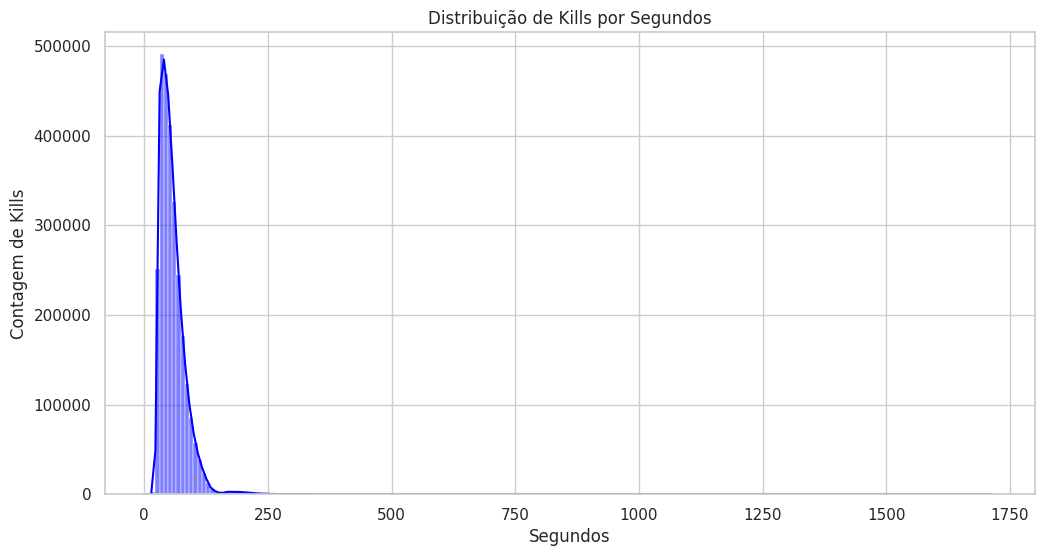

In [12]:
# Definindo o estilo do gráfico
sns.set(style="whitegrid")

# Ajustando o tamanho da figura
plt.figure(figsize=(12, 6))


# Criando o histograma
sns.histplot(kills_df['seconds'], bins=200, kde=True, color='blue')

# Adicionando títulos e rótulos
plt.title('Distribuição de Kills por Segundos')
plt.xlabel('Segundos')
plt.ylabel('Contagem de Kills')

# Exibindo o gráfico
plt.show()

# Damage

In [13]:
# Dataframe: damage
damage_df = pd.concat([damage_df_part1, damage_df_part2])
del damage_df_part1
del damage_df_part2
damage_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10538182 entries, 0 to 4546084
Data columns (total 23 columns):
 #   Column           Dtype  
---  ------           -----  
 0   file             object 
 1   round            int64  
 2   tick             int64  
 3   seconds          float64
 4   att_team         object 
 5   vic_team         object 
 6   att_side         object 
 7   vic_side         object 
 8   hp_dmg           int64  
 9   arm_dmg          int64  
 10  is_bomb_planted  bool   
 11  bomb_site        object 
 12  hitbox           object 
 13  wp               object 
 14  wp_type          object 
 15  att_id           int64  
 16  att_rank         int64  
 17  vic_id           int64  
 18  vic_rank         int64  
 19  att_pos_x        float64
 20  att_pos_y        float64
 21  vic_pos_x        float64
 22  vic_pos_y        float64
dtypes: bool(1), float64(5), int64(8), object(9)
memory usage: 1.8+ GB


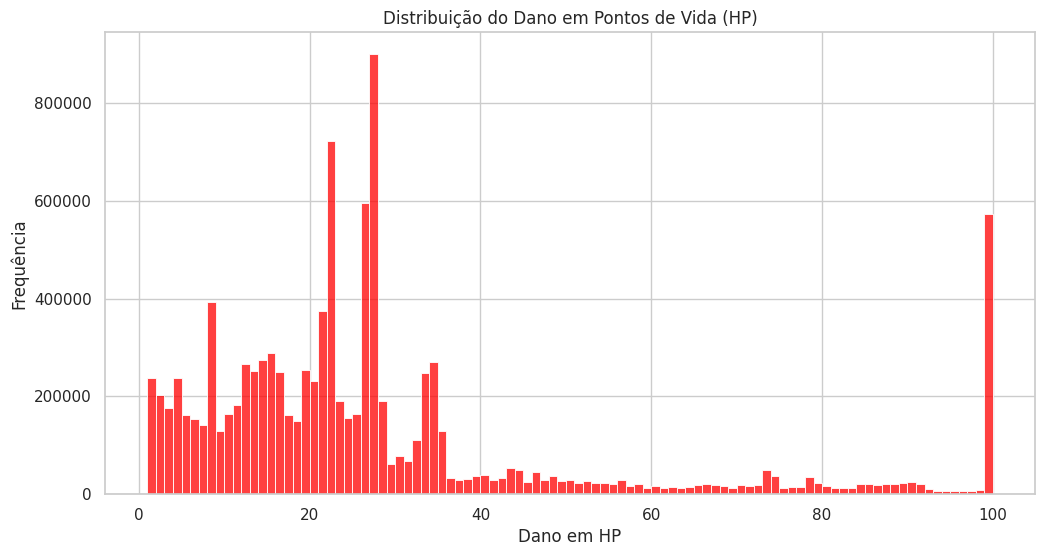

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo o estilo do gráfico
sns.set(style="whitegrid")

# Ajustando o tamanho da figura
plt.figure(figsize=(12, 6))


# Criando o histograma com uma largura de bin específica
sns.histplot(damage_df['hp_dmg'], binwidth=1, color='red')

# Adicionando títulos e rótulos
plt.title('Distribuição do Dano em Pontos de Vida (HP)')
plt.xlabel('Dano em HP')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()


# Grenades   

In [15]:
grenades_df = pd.concat([grenades_df_part1, grenades_df_part2])
del grenades_df_part1
del grenades_df_part2
grenades_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5246458 entries, 0 to 2256397
Data columns (total 23 columns):
 #   Column           Dtype  
---  ------           -----  
 0   file             object 
 1   round            int64  
 2   seconds          float64
 3   att_team         object 
 4   vic_team         object 
 5   att_id           int64  
 6   vic_id           float64
 7   att_side         object 
 8   vic_side         object 
 9   hp_dmg           int64  
 10  arm_dmg          int64  
 11  is_bomb_planted  bool   
 12  bomb_site        object 
 13  hitbox           object 
 14  nade             object 
 15  att_rank         int64  
 16  vic_rank         float64
 17  att_pos_x        float64
 18  att_pos_y        float64
 19  nade_land_x      float64
 20  nade_land_y      float64
 21  vic_pos_x        float64
 22  vic_pos_y        float64
dtypes: bool(1), float64(9), int64(5), object(8)
memory usage: 925.6+ MB


## Weapons

In [16]:
weapon_events['round_type'].value_counts()

round_type
NORMAL          425090
ECO             244599
FORCE_BUY       143944
PISTOL_ROUND     75133
SEMI_ECO         66700
Name: count, dtype: int64

In [17]:
# Assuming weapon_events is your DataFrame and 'round_type' is one of its columns
round_type_counts = weapon_events['round_type'].value_counts().reset_index()
round_type_counts.columns = ['Round_Type', 'Count']

# Creating a bar chart with Plotly Express
fig = px.bar(round_type_counts, 
             x='Round_Type', 
             y='Count', 
             title='Event Count by Round Type',
             labels={'Count': 'Count', 'Round_Type': 'Round Type'},
             color='Round_Type',  # This assigns a unique color to each round type
             )

# Improving the presentation a bit
fig.update_layout(xaxis_title='Round Type',
                  yaxis_title='Event Count',
                  coloraxis_showscale=False)

# Displaying the chart
fig.show()


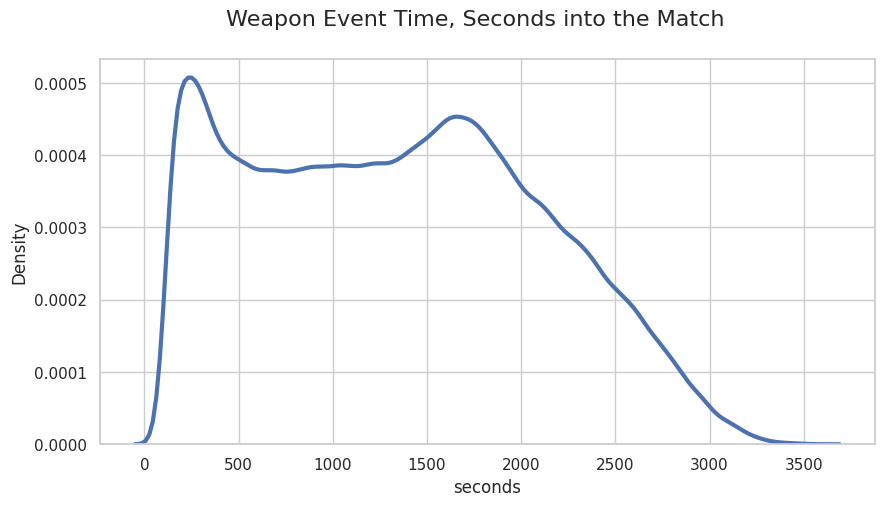

In [18]:
# Adjusting the size of the figure
fig = plt.figure(figsize=(10, 5))

# Plotting the KDE plot with thicker line
sns.kdeplot(weapon_events['seconds'], linewidth=3)

# Adding a title
plt.suptitle("Weapon Event Time, Seconds into the Match", fontsize=16)

# Displaying the plot
plt.show()

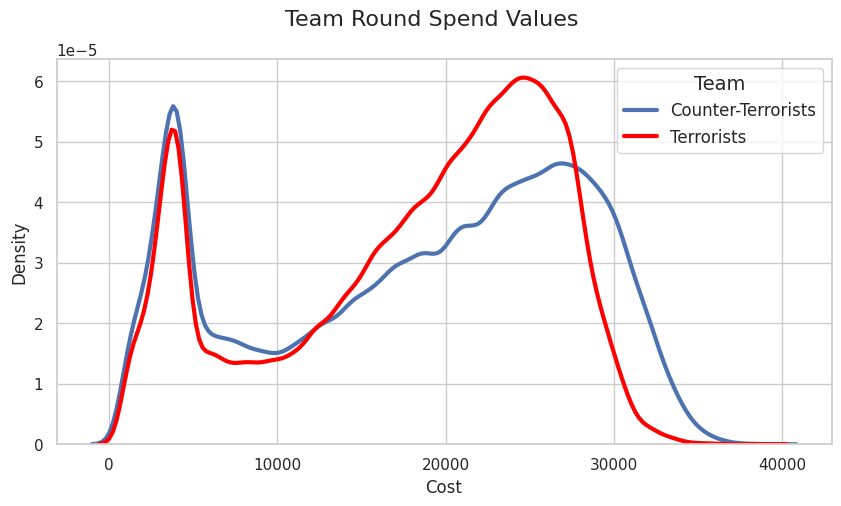

In [19]:
# Adjusting the size of the figure
fig = plt.figure(figsize=(10, 5))

# Plotting the KDE plot for Counter-Terrorists with label
sns.kdeplot(weapon_events['ct_eq_val'], label='Counter-Terrorists', linewidth=3)

# Plotting the KDE plot for Terrorists with label and red color
sns.kdeplot(weapon_events['t_eq_val'], label='Terrorists', linewidth=3, color='red')

# Adding a legend
plt.legend(title='Team', title_fontsize='14', fontsize='12')

# Adding a title
plt.suptitle("Team Round Spend Values", fontsize=16)

# Setting x-axis label
plt.xlabel('Cost')

# Displaying the plot
plt.show()

In [20]:
weapon_events.columns

Index(['Unnamed: 0', 'file', 'map', 'date', 'round', 'tick', 'seconds',
       'att_team', 'vic_team', 'att_side', 'vic_side', 'hp_dmg', 'arm_dmg',
       'is_bomb_planted', 'bomb_site', 'hitbox', 'wp', 'wp_type', 'award',
       'winner_team', 'winner_side', 'att_id', 'att_rank', 'vic_id',
       'vic_rank', 'att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y',
       'round_type', 'ct_eq_val', 't_eq_val', 'avg_match_rank'],
      dtype='object')

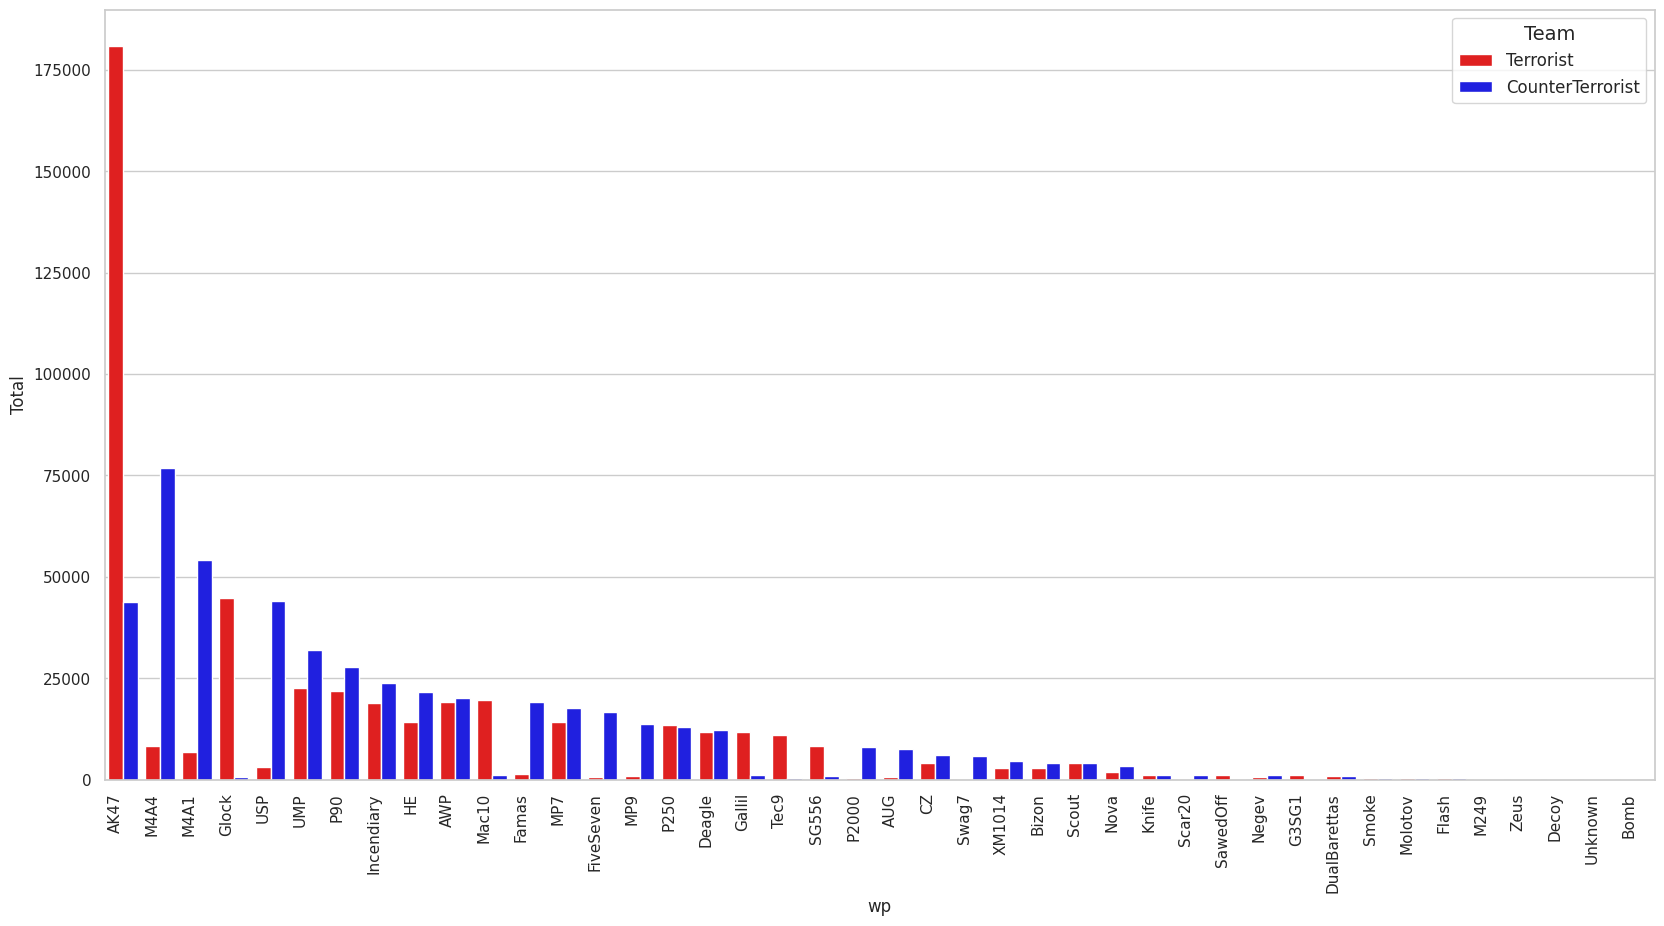

In [21]:
import seaborn as sns
import pandas as pd

# Agrupando e resumindo os dados
weapon_counts = weapon_events.groupby(['wp', 'att_side']).size().reset_index(name='Total')

# Ordenando por Total em ordem decrescente
weapon_counts = weapon_counts.sort_values(by='Total', ascending=False)

# Plotando o histograma com Seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x='wp', y='Total', hue='att_side', data=weapon_counts, palette=['red', 'blue'])

# Ajustando o ângulo do texto do eixo x
plt.xticks(rotation=90, ha='right')

# Removendo a legenda do Seaborn e adicionando manualmente
plt.legend(title='Team', title_fontsize='14', fontsize='12', loc='upper right')

# Exibindo o gráfico
plt.show()


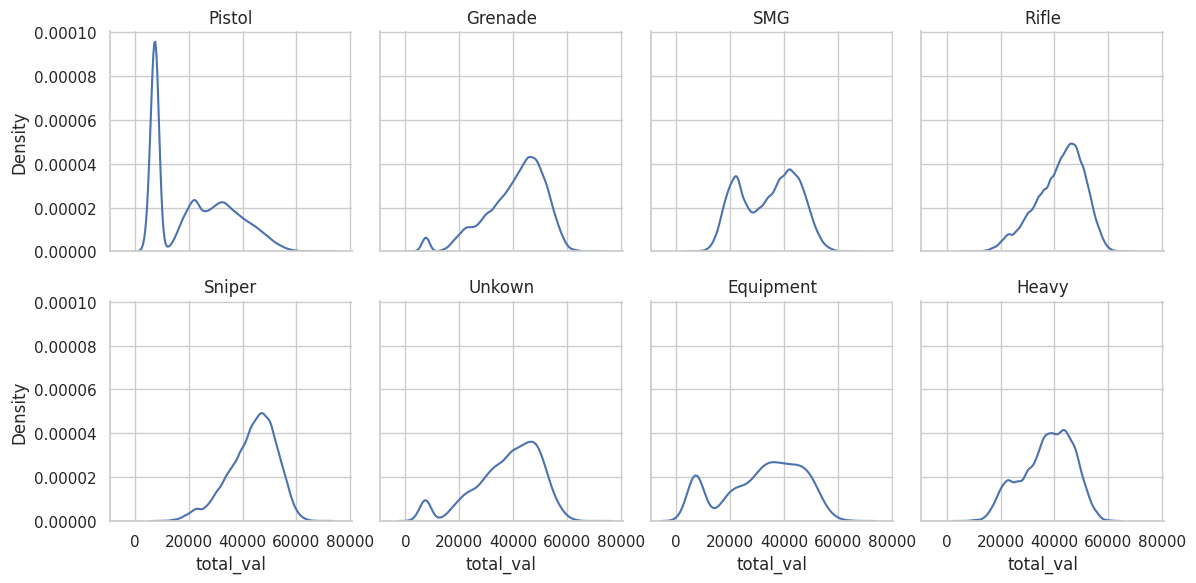

In [22]:
# Criando a coluna 'total_val' e renomeando para representar o nome da arma
weapon_events['total_val'] = weapon_events['ct_eq_val'] + weapon_events['t_eq_val']
weapon_events['wp_type'] = weapon_events['wp_type'].str.split('_').str[-1]

# Criando o FacetGrid
g = sns.FacetGrid(weapon_events, col="wp_type", col_wrap=4)

# Mapeando o KDE plot
g.map(sns.kdeplot, 'total_val')

# Atualizando os títulos dos eixos x
g.set_titles("{col_name}")

# Exibindo o gráfico
plt.show()

In [23]:
match_level_data = weapon_events.groupby('file').head()

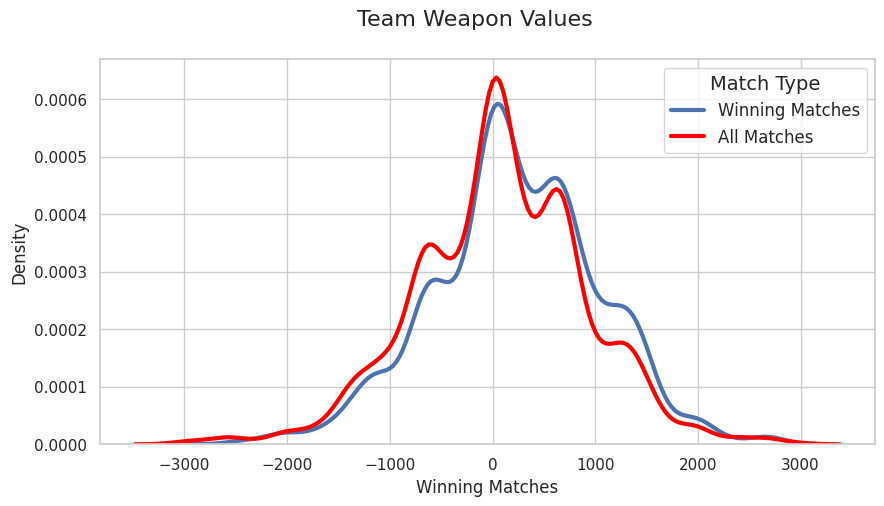

In [24]:
# Definindo o tamanho da figura
fig = plt.figure(figsize=(10, 5))

# Plotando os KDE plots com nome e grossura das linhas, e atribuindo uma legenda
sns.kdeplot(match_level_data.query('winner_side == "CounterTerrorist"').pipe(lambda df: df.ct_eq_val - df.t_eq_val).rename('Winning Matches'), label='Winning Matches', linewidth=3)
sns.kdeplot(match_level_data.pipe(lambda df: df.ct_eq_val - df.t_eq_val).rename('All Matches'), label='All Matches', linewidth=3, color='red')

# Adicionando uma legenda
plt.legend(title='Match Type', title_fontsize='14', fontsize='12')

# Adicionando um título
plt.suptitle("Team Weapon Values", fontsize=16)

# Exibindo o gráfico
plt.show()


In [33]:
import pandas as pd
import plotly.express as px

# Supondo que você já tem seu dataframe weapon_events

# Group by Hitbox and Gun, then summarize Hits
grouped_data = weapon_events.groupby(['hitbox', 'wp']).size().reset_index(name='Hits')
# Ordenar os dados por 'Hits' em ordem decrescente
grouped_data = grouped_data.sort_values(by='Hits', ascending=False)

# Filter Hits > 20 and Hitbox != 'Generic'
filtered_data = grouped_data[(grouped_data['Hits'] > 20) & (grouped_data['hitbox'] != 'Generic')]

# Plot
fig = px.bar(filtered_data, x='hitbox', y='Hits', color='wp', 
             labels={'hitbox': 'Hitbox', 'Hits': 'Hits', 'wp': 'Gun'},
             title='Weapon Hits per Hitbox',
             barmode='group')

# Rotate x-axis labels
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

In [34]:
import pandas as pd
import plotly.express as px

# Supondo que você já tem seu dataframe weapon_events

# Group by Hitbox and Gun, then summarize Hits
grouped_data = weapon_events.groupby(['hitbox', 'wp_type']).size().reset_index(name='Hits')
# Ordenar os dados por 'Hits' em ordem decrescente
grouped_data = grouped_data.sort_values(by='Hits', ascending=False)
# Filter Hits > 20 and Hitbox != 'Generic'
filtered_data = grouped_data[(grouped_data['Hits'] > 20) & (grouped_data['hitbox'] != 'Generic')]

# Plot
fig = px.bar(filtered_data, x='hitbox', y='Hits', color='wp_type', 
             labels={'hitbox': 'Hitbox', 'Hits': 'Hits', 'wp_type': 'Gun'},
             title='Weapon Hits per Hitbox',
             barmode='group')

# Rotate x-axis labels
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

In [27]:
import pandas as pd
import plotly.express as px

# Supondo que você já tem seu dataframe weapon_events

# Group by Hitbox and Gun, then summarize Hits
grouped_data = weapon_events.groupby(['hitbox', 'att_side']).size().reset_index(name='Hits')

# Filter Hits > 20 and Hitbox != 'Generic'
filtered_data = grouped_data[(grouped_data['Hits'] > 20) & (grouped_data['hitbox'] != 'Generic')]

# Plot
fig = px.bar(filtered_data, x='hitbox', y='Hits', color='att_side', 
            #  labels={'hitbox': 'Hitbox', 'Hits': 'Hits', 'att_side': 'Gun'},
             title='Weapon Hits per Hitbox',
             barmode='group')

# Rotate x-axis labels
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()

In [28]:
import plotly.express as px

# Supondo que você tenha o pandas dataframe 'weapon_events_summary' carregado
weapon_events_summary = weapon_events.groupby(['wp', 'att_side']).size().reset_index(name='Total')

# Crie o gráfico
fig = px.bar(weapon_events_summary, x='wp', y='Total', color='att_side',
            #  color_discrete_map={'Terrorist': 'red', 'Counter-Terrorist': 'blue'},
             labels={'wp': 'Weapon', 'Total': 'Total'},
             title='Weapon Events Summary')

# Ajuste o layout
fig.update_layout(xaxis_tickangle=-90)

# Remova a legenda de cores
fig.update_traces(showlegend=True)

# Exiba o gráfico
fig.show()